# Principle Component Aanalysis 

Source: https://github.com/patrickloeber/MLfromscratch/blob/master/mlfromscratch/pca.py

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load csv file 
df = pd.read_csv('./preprocessed_data/norm_data_standardized.csv', index_col=False)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.779975,-0.179534,-0.283909,-0.343666,2.0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.420693,-0.179534,-0.611387,-0.343666,2.0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.129474,-0.179534,1.353485,-0.343666,2.0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0


In [4]:
import numpy as np


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)



In [7]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [8]:
# Project data over 2 principal component
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)


In [9]:
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (699, 9)
Shape of transformed X: (699, 2)


In [11]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]


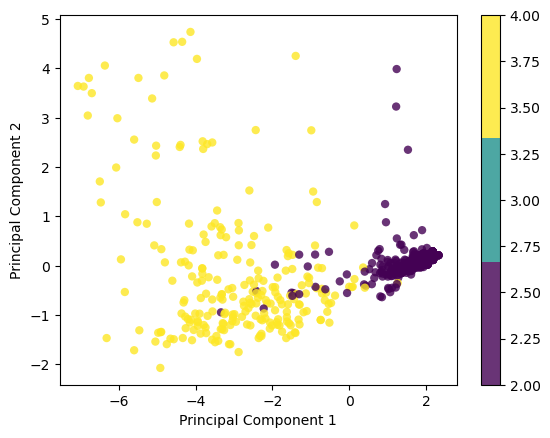

In [12]:
 plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, 
             cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()